#Handle Data

In [1]:
!pip install flashtext


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9307 sha256=64a196a96cd4288e47d76aec731913d2a36bddf1bd9c07a8948369eb273135e9
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext


In [2]:
!pip install Unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 14.1 MB/s 


In [38]:
import pandas as pd
import json
import re
import numpy as np
from flashtext import KeywordProcessor
from unidecode import unidecode

In [ ]:
from google.colab import files
files.upload()

In [39]:
#Read data 1
train_df1 = pd.read_csv("/content/train_preprocess.tsv", sep='\t', names=['Tweet', 'Sentimen'], header=None)
train_df1

,Tweet,Sentimen
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [40]:
#Drop duplicates data 1
train_df1 = train_df1.drop_duplicates()
train_df1

,Tweet,Sentimen
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10993,f - demokrat dorong upaya kemandirian energi n...,neutral
10994,tidak bosan,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [43]:
#Count value (Sentimen) data 1
train_df1['Sentimen'].value_counts()

positive    6383
negative    3412
neutral     1138
Name: Sentimen, dtype: int64

In [64]:
#Read data 2
train_df2 = pd.read_csv("/content/Indonesian Sentiment Twitter Dataset Labeled.csv", sep='\t')
train_df2

,sentimen,Tweet
0,-1,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...
1,-1,kita lanjutkan saja diam ini hingga kau dan ak...
2,1,doa rezeki tak putus inna haa zaa larizquna ma...
3,1,makasih loh ntar kita bagi hasil aku 99 9 sisa...
4,-1,aku tak faham betul jenis orang malaysia yang ...
...,...,...
10801,1,Jangan membandingkan kehidupanmu dengan kehidu...
10802,0,Sini uname lu ntar gua follow
10803,1,Apapun yg telah kamu lakukan apapun kesalahanm...
10804,1,3 cara untuk ingat semula apa yang kita dah ha...


In [65]:
#Drop label positive (sentimen=1) data 2 
train_df2 = train_df2[train_df2['sentimen'] < 1]
train_df2

,sentimen,Tweet
0,-1,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...
1,-1,kita lanjutkan saja diam ini hingga kau dan ak...
4,-1,aku tak faham betul jenis orang malaysia yang ...
5,0,barusan liat tulisan di belakang truk rela inj...
6,-1,cerita dia macam ni mamat ni hari2 aku nampak ...
...,...,...
10797,0,Jadi kita harus mkn dulu di KFC sebesar 60 rib...
10798,0,Tante kapan nikah Akun RP panggil calon istri ...
10799,-1,Pelik tengok orang zaman sekarang ni dulu kema...
10800,0,Menikah itu belum tentu harus sudah pernah pac...


In [66]:
#Drop duplicates data 2
train_df2 = train_df2.drop_duplicates()
train_df2

,sentimen,Tweet
0,-1,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...
1,-1,kita lanjutkan saja diam ini hingga kau dan ak...
4,-1,aku tak faham betul jenis orang malaysia yang ...
5,0,barusan liat tulisan di belakang truk rela inj...
6,-1,cerita dia macam ni mamat ni hari2 aku nampak ...
...,...,...
10797,0,Jadi kita harus mkn dulu di KFC sebesar 60 rib...
10798,0,Tante kapan nikah Akun RP panggil calon istri ...
10799,-1,Pelik tengok orang zaman sekarang ni dulu kema...
10800,0,Menikah itu belum tentu harus sudah pernah pac...


In [67]:
#Count value (sentimen) data 2
train_df2['sentimen'].value_counts()

 0    5084
-1    2691
Name: sentimen, dtype: int64

In [68]:
#Replace label 0 to neutral and -1 to negative
train_df2['Sentimen'] = np.where(train_df2['sentimen']== 0, 'neutral', 'negative')
train_df2.drop('sentimen', axis=1, inplace=True)
train_df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Tweet,Sentimen
0,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...,negative
1,kita lanjutkan saja diam ini hingga kau dan ak...,negative
4,aku tak faham betul jenis orang malaysia yang ...,negative
5,barusan liat tulisan di belakang truk rela inj...,neutral
6,cerita dia macam ni mamat ni hari2 aku nampak ...,negative
...,...,...
10797,Jadi kita harus mkn dulu di KFC sebesar 60 rib...,neutral
10798,Tante kapan nikah Akun RP panggil calon istri ...,neutral
10799,Pelik tengok orang zaman sekarang ni dulu kema...,negative
10800,Menikah itu belum tentu harus sudah pernah pac...,neutral


In [81]:
#Combine data 1 and data 2
train_df = pd.concat([train_df1, train_df2])
train_df

,Tweet,Sentimen
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10797,Jadi kita harus mkn dulu di KFC sebesar 60 rib...,neutral
10798,Tante kapan nikah Akun RP panggil calon istri ...,neutral
10799,Pelik tengok orang zaman sekarang ni dulu kema...,negative
10800,Menikah itu belum tentu harus sudah pernah pac...,neutral


In [84]:
#Count value (Sentimen) final data training
train_df['Sentimen'].value_counts()

positive    6383
neutral     6222
negative    6103
Name: Sentimen, dtype: int64

In [85]:
#Cleansing data (tweet)
train_df['Tweet'] = train_df['Tweet'].str.strip()
train_df['Tweet'] = train_df['Tweet'].replace(r'([A-Z]+)\s(\d+)', r'\1\2', regex=True)
train_df['Tweet'] = train_df['Tweet'].str.replace(r'\\x[A-Za-z0-9./:)(*&^%$#@!_;]+', '')
train_df['Tweet'] = train_df['Tweet'].str.replace(r'[^\w\d\s]+', '')
train_df['Tweet'] = train_df['Tweet'].str.lower()
train_df['Tweet'] = train_df['Tweet'].str.replace(r'user', '')
train_df['Tweet'] = train_df['Tweet'].str.replace(r'_', '')
train_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,Tweet,Sentimen
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung te...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh jadi mahasiswa jangan sombong dong kasih...,negative
...,...,...
10797,jadi kita harus mkn dulu di kfc sebesar 60 rib...,neutral
10798,tante kapan nikah akun rp panggil calon istri ...,neutral
10799,pelik tengok orang zaman sekarang ni dulu kema...,negative
10800,menikah itu belum tentu harus sudah pernah pac...,neutral


In [86]:
#Reset Index
train_df = train_df.reset_index()
train_df.drop('index', axis=1, inplace=True)
train_df

,Tweet,Sentimen
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung te...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh jadi mahasiswa jangan sombong dong kasih...,negative
...,...,...
18703,jadi kita harus mkn dulu di kfc sebesar 60 rib...,neutral
18704,tante kapan nikah akun rp panggil calon istri ...,neutral
18705,pelik tengok orang zaman sekarang ni dulu kema...,negative
18706,menikah itu belum tentu harus sudah pernah pac...,neutral


In [87]:
#Read alay dictionary
alay_dict_df = pd.read_csv('/content/colloquial-indonesian-lexicon.csv')
alay_dict_df

,slang,formal,In-dictionary,context,category1,category2,category3
0,woww,wow,1,wow,elongasi,0,0
1,aminn,amin,1,Selamat ulang tahun kakak tulus semoga panjang...,elongasi,0,0
2,met,selamat,1,Met hari netaas kak!? Wish you all the best @t...,abreviasi,0,0
3,netaas,menetas,1,Met hari netaas kak!? Wish you all the best @t...,afiksasi,elongasi,0
4,keberpa,keberapa,0,Birthday yg keberpa kak?,abreviasi,0,0
...,...,...,...,...,...,...,...
15001,gataunya,enggak taunya,0,Ini kaya nenek2 ya beb gataunya agnezz @yugime...,akronim,0,0
15002,gtau,enggak tau,0,Stidaknya mrka may berkarya Dan berusaha yg tr...,akronim,abreviasi,0
15003,gatau,enggak tau,0,Ih gatau malu,akronim,0,0
15004,fans2,fan-fan,0,Jkt48 adalah tempat di mana sesama fans saling...,reduplikasi,naturalisasi,0


In [88]:
alay_dict = alay_dict_df.groupby('formal')['slang'].apply(list).to_dict()

In [89]:
with open("alay_dict.json", "w") as outfile:
  json.dump(alay_dict, outfile)

In [90]:
from google.colab import files
files.download ("alay_dict.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [91]:
with open("alay_dict.json") as f:
  alay_dict = json.load(f)

In [92]:
keyword_processor = KeywordProcessor()
keyword_processor.add_keywords_from_dict(alay_dict)

def replace_alay(text):
  return keyword_processor.replace_keywords(text)

In [93]:
train_df['Tweet'] = train_df['Tweet'].apply(replace_alay)
train_df

,Tweet,Sentimen
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung te...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh jadi mahasiswa jangan sombong dong kasih...,negative
...,...,...
18703,jadi kita harus makin dulu di kfc sebesar 60 r...,neutral
18704,tante kapan nikah akun rp panggil calon istri ...,neutral
18705,pelik tengok orang zaman sekarang nih dulu kem...,negative
18706,menikah itu belum tentu harus sudah pernah pac...,neutral


In [95]:
tweet_sentimen_count = train_df['Sentimen'].value_counts()
tweet_sentimen_count = pd.DataFrame({"Sentimen":tweet_sentimen_count.index,"Total":tweet_sentimen_count.values})
tweet_sentimen_count

,Sentimen,Total
0,positive,6383
1,neutral,6222
2,negative,6103


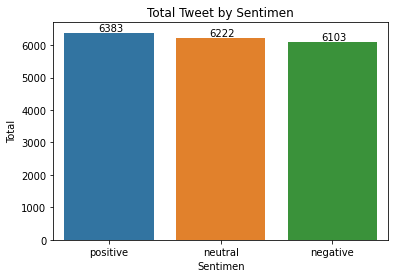

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(data=tweet_sentimen_count,x="Sentimen",y="Total", errwidth=0)
plt.title("Total Tweet by Sentimen")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+62))

In [128]:
#Download final data for training
train_df.to_csv('/content/final_data_training.csv')

#BERT Tokenizer

In [115]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 10.7 MB/s 
     |████████████████████████████████| 182 kB 75.4 MB/s 
     |████████████████████████████████| 7.6 MB 50.8 MB/s 


In [116]:
from transformers import BertTokenizer

In [117]:
tokenizer_model = "indobenchmark/indobert-base-p1"
print("Loading BERT Tokenizer")
tokenizer = BertTokenizer.from_pretrained(tokenizer_model, do_lower_case=True)

Loading BERT Tokenizer


Downloading:   0%|          | 0.00/229k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

In [119]:
print("Original  : ", train_df['Tweet'][5])
print("Tokenized : ", tokenizer.tokenize(train_df['Tweet'][5]))
print("Token IDS : ", tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_df['Tweet'][5])))

Original  :  makanan beragam  harga makanan di food stall akan ditambahkan 10  lagi di kasir  suasana ramai dan perlu perhatian untuk mendapatkan parkir dan tempat duduk
Tokenized :  ['makanan', 'beragam', 'harga', 'makanan', 'di', 'food', 'sta', '##ll', 'akan', 'ditambahkan', '10', 'lagi', 'di', 'kasir', 'suasana', 'ramai', 'dan', 'perlu', 'perhatian', 'untuk', 'mendapatkan', 'parkir', 'dan', 'tempat', 'duduk']
Token IDS :  [955, 3585, 405, 955, 26, 7729, 15926, 13520, 150, 6903, 740, 423, 26, 14797, 3706, 6234, 41, 735, 2598, 90, 778, 5222, 41, 515, 2499]


In [121]:
input_ids = []

for t in train_df['Tweet']:
  encoded_t = tokenizer.encode(
      t,
      add_special_tokens = True
  )
  input_ids.append(encoded_t)

print("Original: ", train_df['Tweet'][0])
print("Token IDs: ", input_ids[0])

Original:  warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung  tahu berkualitas  dipadu keahlian memasak  dipadu kretivitas  jadilah warung yang menyajikan menu utama berbahan tahu  ditambah menu umum lain seperti ayam  semuanya selera indonesia  harga cukup terjangkau  jangan lewatkan tahu bletoka nya  tidak kalah dengan yang asli dari tegal
Token IDs:  [2, 6540, 92, 2970, 213, 4259, 3553, 899, 34, 259, 5590, 262, 2558, 386, 899, 1687, 26, 1574, 899, 3310, 22130, 30360, 6123, 6368, 22130, 30360, 2652, 1746, 8869, 6540, 34, 6315, 1622, 1256, 8949, 899, 4222, 1622, 752, 245, 295, 2083, 2346, 7107, 300, 405, 724, 5189, 843, 17464, 899, 540, 10989, 3331, 1107, 119, 3221, 79, 34, 2170, 98, 9167, 3]


In [122]:
print("Max sentence length: ", max([len(tweet) for tweet in input_ids]))

Max sentence length:  106


In [124]:
from keras_preprocessing.sequence import pad_sequences

MAX_LEN = 128

print("Padding/truncating all sentences to %d values" % MAX_LEN)
print('Padding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype='long', value=0, truncating='post', padding='post')

print("Done")

Padding/truncating all sentences to 128 values
Padding token: "[PAD]", ID: 0
Done


In [125]:
input_ids[0]

array([    2,  6540,    92,  2970,   213,  4259,  3553,   899,    34,
         259,  5590,   262,  2558,   386,   899,  1687,    26,  1574,
         899,  3310, 22130, 30360,  6123,  6368, 22130, 30360,  2652,
        1746,  8869,  6540,    34,  6315,  1622,  1256,  8949,   899,
        4222,  1622,   752,   245,   295,  2083,  2346,  7107,   300,
         405,   724,  5189,   843, 17464,   899,   540, 10989,  3331,
        1107,   119,  3221,    79,    34,  2170,    98,  9167,     3,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0]

In [126]:
attention_mask = []

for sent in input_ids:
  att_mask = [int(token_id > 0) for token_id in sent]

  attention_mask.append(att_mask)